<center> <a href="https://github.com/CyConProject?tab=repositories">
  <img src="https://github.com/CyConProject/Lab/blob/main/Figures/CyCon.png?raw=true" alt="logo" width="80" >
</a>
 </center>



# Decision Trees

In this lab, we will explore the Decision Trees algorithm, an essential tool for making informed decisions in various domains. By mastering Decision Trees, you'll gain insights into more complex methods like Random Forests and Gradient Boosting, essential for advanced data science applications.

Imagine using historical data to choose the most efficient building material for a new construction project, or determining the most effective structural design to withstand environmental stresses. These are examples of decision-making scenarios in construction where Decision Trees can provide clear insights and predictions.

At its core, Decision Tree is a non-parametric supervised learning method used for classification and regression. The algorithm models decisions and their possible consequences as a tree-like structure, making it intuitive and easy to understand. In decision analysis, a decision tree can be used visually and explicitly to represent decisions and decision making.

### Objectives:

During this lab, we will explore several key aspects of the Decision Trees algorithm, including:

- **Data Preparation**: Learn to prepare and clean your data, ensuring it is suitable for building a Decision Tree model.
- **Model Building**: Construct a Decision Tree to assess the condition of culverts based on a range of environmental and physical attributes.
- **Model Evaluation**: Evaluate the performance of your Decision Tree model and learn to interpret its results to make informed decisions.
- **Model Complexity**: Understand how to manage the complexity of your Decision Tree to avoid overfitting through techniques such as setting maximum depth.


By the end of this lab, you will not only understand how the Decision Trees algorithm functions but also how to implement it to solve real-world problems effectively within the construction field. So, let's dive into the detailed and fascinating world of Decision Trees!

### Step 1: Import necessary libraries

In [36]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

### Step 2: Load the dataset

In [37]:
# Load the Culvert Dataset
data = pd.read_csv('https://raw.githubusercontent.com/CyConProject/Lab/main/Datasets/Augmented%20Culvert%20Dataset.csv')

# Display the first few rows of the dataset to understand its structure
data.head()

,length,cul_matl,cul_type,Soil_Drainage_Class,Soil_Moisture,Soil_pH,Soil_Elec_Conductivity,Soil_Surface_Texture,Flooding_Frequency,State,Age,Cul_rating
0,62.1,Steel Plate,Arch,Somewhat excessively drained,6.5,7.6,0.0,Fine Sandy Loam,Occasional,1,86,0
1,24.0,Corrugated Steel,Round,Poorly drained,3.8,5.7,0.0,Fine Sandy Loam,Frequent,2,50,0
2,21.0,Unreinforced Concrete,Box,Poorly drained,14.8,6.7,0.0,Moderately Decomposed Plant Material,Occasional,1,62,0
3,21.0,Unreinforced Concrete,Box,Well drained,10.3,9.4,5.7,Clay Loam,NaN,1,75,0
4,36.0,Corrugated Steel,Round,Moderately well drained,2.6,5.3,0.0,Fine Sandy Loam,NaN,2,43,0


#### `Augmented Culvert Dataset.csv`:

**Context:**
This dataset focuses on the condition assessment of culverts based on their physical and environmental attributes. Culverts are structures that allow water to flow under a road, railroad, trail, or similar obstruction. It comprises 4,435 records collected from four different states, combining their individual culvert inventories into a robust dataset suitable for multiclass classification.

**Target:**
The target variable of the dataset is the condition of the culverts, categorized into various classes representing different levels of structural integrity and functionality. The culvert condition rating ranges from 0 to 4, where 0 represents a critical condition and 4 represents an excellent condition.

**Attributes:**
1. length: The length of the culvert (in feet).
2. cul_matl (Culvert Material): Material of the culvert, such as Corrugated Steel or Poly Vinyl Chloride.
3. cul_type (Culvert Type): Shape or type of the culvert, e.g., Round.
4. Soil_Drainage_Class: Classification of the soil drainage at the culvert location.
4. Soil_Moisture: Soil moisture level at the culvert location.
4. Soil_pH: Soil pH level, indicating the acidity or alkalinity.
4. Soil_Elec_Conductivity (Soil Electrical Conductivity): Measures the soil's ability to conduct electric current.
4. Soil_Surface_Texture: Texture of the soil surface around the culvert.
4. Flooding_Frequency: Frequency of flooding at the culvert location.
4. State: State in which the culvert is located.
4. Age: Age of the culvert (in years, since installation).
12. Cul_rating (Culvert Rating): The culvert condition rating.

These features are used to predict the condition of the culverts, in order to prioritize maintenance and inspection efforts efficiently.

### Step 3: Pre-processing

**Handling Missing Data: Filling Blanks**

We must identify any blank values to ensure our data is ready for training. The command `data.isnull().sum()` checks each column for missing entries and sums them.

In [38]:
missing_values_count = data.isnull().sum()
print(missing_values_count)

length                       0
cul_matl                     0
cul_type                     0
Soil_Drainage_Class          0
Soil_Moisture                0
Soil_pH                      0
Soil_Elec_Conductivity       0
Soil_Surface_Texture         0
Flooding_Frequency        3468
State                        0
Age                          0
Cul_rating                   0
dtype: int64


The 'Flooding_Frequency' column in our dataset has 3,468 missing values. To handle this, we use a command that fills these blanks with 'None.' This method is chosen because, in this specific dataset, no entry in 'Flooding_Frequency' suggests that there was no flooding (but this is not always the case so be careful!). While there are many strategies to deal with missing data, this approach is particularly suited to our data’s specific characteristics.

In [39]:
# Fill missing values with a specific category, e.g., 'None'
data['Flooding_Frequency'].fillna(value='None', inplace=True)
data.head()

,length,cul_matl,cul_type,Soil_Drainage_Class,Soil_Moisture,Soil_pH,Soil_Elec_Conductivity,Soil_Surface_Texture,Flooding_Frequency,State,Age,Cul_rating
0,62.1,Steel Plate,Arch,Somewhat excessively drained,6.5,7.6,0.0,Fine Sandy Loam,Occasional,1,86,0
1,24.0,Corrugated Steel,Round,Poorly drained,3.8,5.7,0.0,Fine Sandy Loam,Frequent,2,50,0
2,21.0,Unreinforced Concrete,Box,Poorly drained,14.8,6.7,0.0,Moderately Decomposed Plant Material,Occasional,1,62,0
3,21.0,Unreinforced Concrete,Box,Well drained,10.3,9.4,5.7,Clay Loam,None,1,75,0
4,36.0,Corrugated Steel,Round,Moderately well drained,2.6,5.3,0.0,Fine Sandy Loam,None,2,43,0


**Handling Categorical Features for Decision Trees**

Our dataset contains categorical features such as 'cul_matl', 'cul_type', 'Soil_Drainage_Class', 'Soil_Surface_Texture', and 'Flooding_Frequency'. Unfortunately, Scikit-learn's Decision Trees cannot process categorical variables directly.

We use the `LabelEncoder()` method to prepare these features for analysis. This method converts each category within a column into a unique numerical value. This transforms these categorical variables into a format suitable for machine learning algorithms. This step makes sure our data is fully compatible with Decision Tree models.

In [40]:
# List of categorical columns that need to be label-encoded
categorical_columns = ['cul_matl', 'cul_type', 'Soil_Drainage_Class', 'Soil_Surface_Texture', 'Flooding_Frequency']

# Applying LabelEncoder to the categorical columns
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le  # Store the label encoder for each column

data.head()

,length,cul_matl,cul_type,Soil_Drainage_Class,Soil_Moisture,Soil_pH,Soil_Elec_Conductivity,Soil_Surface_Texture,Flooding_Frequency,State,Age,Cul_rating
0,62.1,5,0,3,6.5,7.6,0.0,12,2,1,86,0
1,24.0,1,4,2,3.8,5.7,0.0,12,0,2,50,0
2,21.0,6,1,2,14.8,6.7,0.0,28,2,1,62,0
3,21.0,6,1,6,10.3,9.4,5.7,4,1,1,75,0
4,36.0,1,4,1,2.6,5.3,0.0,12,1,2,43,0


### Step 4: Extracting Features and Target
We extract the features (X) and the target variable (y) from the dataset. Features are all columns except 'Cul_rating'. 'Cul_rating' represents the rating of the culvert that we want to predict.

In [41]:
# Separating features and target variable
X = data.drop('Cul_rating', axis=1)
y = data['Cul_rating']

X.head()

,length,cul_matl,cul_type,Soil_Drainage_Class,Soil_Moisture,Soil_pH,Soil_Elec_Conductivity,Soil_Surface_Texture,Flooding_Frequency,State,Age
0,62.1,5,0,3,6.5,7.6,0.0,12,2,1,86
1,24.0,1,4,2,3.8,5.7,0.0,12,0,2,50
2,21.0,6,1,2,14.8,6.7,0.0,28,2,1,62
3,21.0,6,1,6,10.3,9.4,5.7,4,1,1,75
4,36.0,1,4,1,2.6,5.3,0.0,12,1,2,43


### Step 5: Create train and test datasets
In this step, we split the dataset into a training set and a testing set. In this example, we use a 80-20 split, with 80% of the data for training and 20% for testing.

In [42]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Practice

Print the shapes of X_train and y_train to ensure they match.

In [43]:
# Your Code Here


<details><summary>Click here for the answer</summary>

```python    
# Check shapes of the training set
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
```

</details>

### Step 6: Initializing and Training the Decision Tree Classifier

#### Step 6-1: **A Small** Decision Tree
Now, to see how a decision tree works, let's have a small model first. We initialize the Decision Tree Classifier with `DecisionTreeClassifier(criterion='entropy',max_depth=2, random_state=42)`. The `random_state` parameter ensures consistent results each time the model is trained, making our experiments reproducible.

After initializing the Decision Tree Classifier, you can view the classifier parameters using `decision_tree.get_params()`. This command will display all the settings used by the decision tree. Except for the `random_state`, `max_depth`, and `criterion` that we specified, the rest of the parameters are the defaults set by the library. These parameters can be adjusted to optimize the model's performance based on the specific characteristics of our dataset.

**Key Default Parameters:**

*   `criterion`: '**entropy**' - Determines how the tree decides to split the data, as discussed in the videos of this section. The default setting of the library for the criterion is 'gini' that measures the impurity of a node.

*   `max_depth`: **2** - We did set this depth so we have a small tree and visualize it. However, by default, the `max_depth` is None and the tree will expand until all leaves are pure or until all leaves contain fewer samples than specified by `min_samples_split`.

*   `min_samples_split`: **2** - The minimum number of samples required to split an internal node.

*   `min_samples_leaf`: **1** - The minimum number of samples that must be present at a leaf node.


These settings are critical as they significantly influence how the decision tree learns from the data.



Model Parameters:
ccp_alpha: 0.0
class_weight: None
criterion: entropy
max_depth: 2
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
random_state: 42
splitter: best


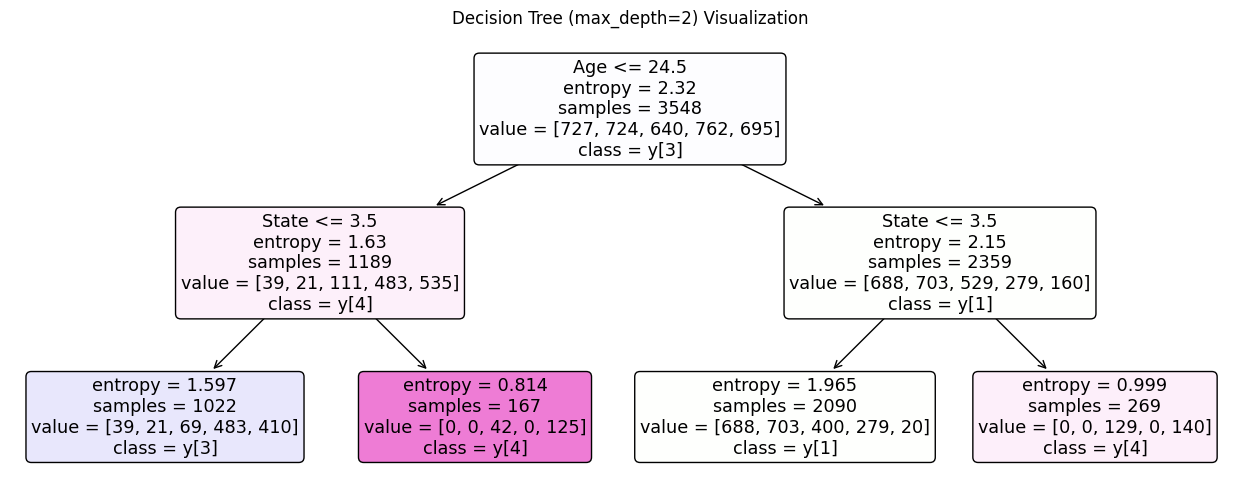

In [44]:
# Initializing and training a small decision tree classifier
model = DecisionTreeClassifier(criterion='entropy',max_depth=2, random_state=42)
model.fit(X_train, y_train)

# Retrieve and print model parameters, each on a new line
params = model.get_params()
print('Model Parameters:')
for key, value in params.items():
    print(f'{key}: {value}')

# Visualize our small tree
plt.figure(figsize=(16,6))
plot_tree(model, filled=True, feature_names=X.columns, class_names=True, rounded=True)
plt.title("Decision Tree (max_depth=2) Visualization")
plt.show()

As you can see in the image above, each node provides information on the entropy, the number of samples it contains, and the distribution of these samples across the classes before the split (`value` attribute). The classes are referring to the condition of the culverts. The class which has the highest count in the `value` attribute is taken as the dominant class for that node (`class` attribute).


Unlike what we understood about decision trees initially, the scikit-learn library does not perform splits based on the number of unique values present in each attribute. Instead, it employs a binary split approach. This is why we need all attributes to be numeric for the model to operate properly within this library.

The maximum depth of the tree is 2, which means there are no more than two decisions from the root to any leaf.

More about this tree:

1. **Root Node (Age <= 24.5)**:
   - This is the first decision point. The data is split based on the feature "Age" with a threshold of 24.5 years.
   - If the age of a culvert is less than or equal to 24.5 years, we move to the left child node.
   - If the age is greater, we go to the right child node.
   - The root node starts with 3548 samples distributed across different classes.
   - The entropy here is 2.32, which is a measure of impurity in the classes of the data at this point.

2. **Left Child Node (State <= 3.5)**:
   - This node further splits the data based on the feature "State" with a threshold of 3.5.
   - If the state of a culvert is less than or equal to 3.5, we move to the left child node.
   - If the state is greater, we move to the right child node.
   - There are 1189 samples at this node before the split.

3. **Left-Left Child Node**:
   - The end node for culverts with Age <= 24.5 and State <= 3.5.
   - It has an entropy of 1.597 with 1022 samples and is most commonly classified as class y[3].

4. **Left-Right Child Node**:
   - The end node for culverts with Age <= 24.5 and State > 3.5.
   - It has a very low entropy of 0.814, which means it's a very pure node with most samples likely belonging to class y[4].
   - There are 167 samples in this node.

5. **Right Child Node (State <= 3.5)**:
   - This node applies the same State <= 3.5 condition but for culverts with Age > 24.5.
   - There are 2359 samples in this node before the split.

6. **Right-Left Child Node**:
   - The end node for culverts with Age > 24.5 and State <= 3.5.
   - It has an entropy of 1.965 with 2090 samples and is most commonly classified as class y[1].

7. **Right-Right Child Node**:
   - The end node for culverts with Age > 24.5 and State > 3.5.
   - It has an entropy of 0.999 with 269 samples and is most commonly classified as class y[4].



#### Step 6-2: The Main Decision Tree

Now let's initialize our full grown decision tree.

In [45]:
# Initializing and training the decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

Now, we train the classifier on the training data.

In [46]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Step 7: Making Predictions
We use the trained Decision Tree classifier to make predictions on the test data.

In [47]:
# Make predictions on the testing data
y_pred = decision_tree.predict(X_test)
print(y_pred[:5])
print(y_test[:5])

[2 0 2 1 0]
2392    2
842     0
2480    2
964     1
318     0
Name: Cul_rating, dtype: int64


### Step 8: Evaluating the Model
Finally, we evaluate the model's performance by calculating accuracy and generating a classification report, which provides detailed metrics such as precision, recall, and F1-score for each class.

In [48]:
# Evaluate the performance of the classifier
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       194
           1       0.92      0.98      0.95       190
           2       0.78      0.81      0.79       158
           3       0.73      0.55      0.62       165
           4       0.72      0.76      0.74       180

    accuracy                           0.83       887
   macro avg       0.82      0.82      0.81       887
weighted avg       0.82      0.83      0.82       887



In [49]:
# Checking the accuracy of the model on the training set and testing set
training_accuracy = decision_tree.score(X_train, y_train)
testing_accuracy = decision_tree.score(X_test, y_test)

print(f"Training Accuracy: {training_accuracy*100:.2f}%")
print(f"Testing Accuracy: {testing_accuracy*100:.2f}%")


Training Accuracy: 98.79%
Testing Accuracy: 82.75%


#### **Interpretation of the results**

These percentages reflect how accurately the model predicts outcomes. A high training accuracy paired with a lower testing accuracy, like in this case, may suggest the model is overfitting on the training data.

**Understanding Overfitting:**

We will learn more about overfitting in future modules, but for now, overfitting happens when the model learns the details and noise in the training data to an extent that it negatively impacts the performance on new data. Essentially, the model is too closely fitted to the training set, making it perform well there but poorly on any outside data.


**Strategies to Reduce Overfitting:**

There are a number of ways to avoid this situation, we might need to change our model and implement some measures such as:

*   **Reducing the complexity of the model** by setting a maximum depth for the tree (`max_depth`) or increasing the `min_samples_split` and `min_samples_leaf` parameters to prevent the model from creating overly specific rules based on the training data.
*    **Using cross-validation techniques** to ensure that the model's accuracy is consistent across different subsets of the training data. we will talk more acout this in the future modules.
*    **Incorporating more training data** to give the model a better base to learn from, which can generalize better on new, unseen data.
*    **Pruning the tree** after it has been created to remove parts of the tree that provide little power in predicting target values.

By adopting these strategies, we can enhance the model’s ability to generalize and thus improve its performance on new data.



### Step 9: Visualize the Tree

Let's see how our tree looks like.

In [50]:
max_depth = decision_tree.get_depth()
print("The maximum depth of the decision tree is:", max_depth)

The maximum depth of the decision tree is: 22


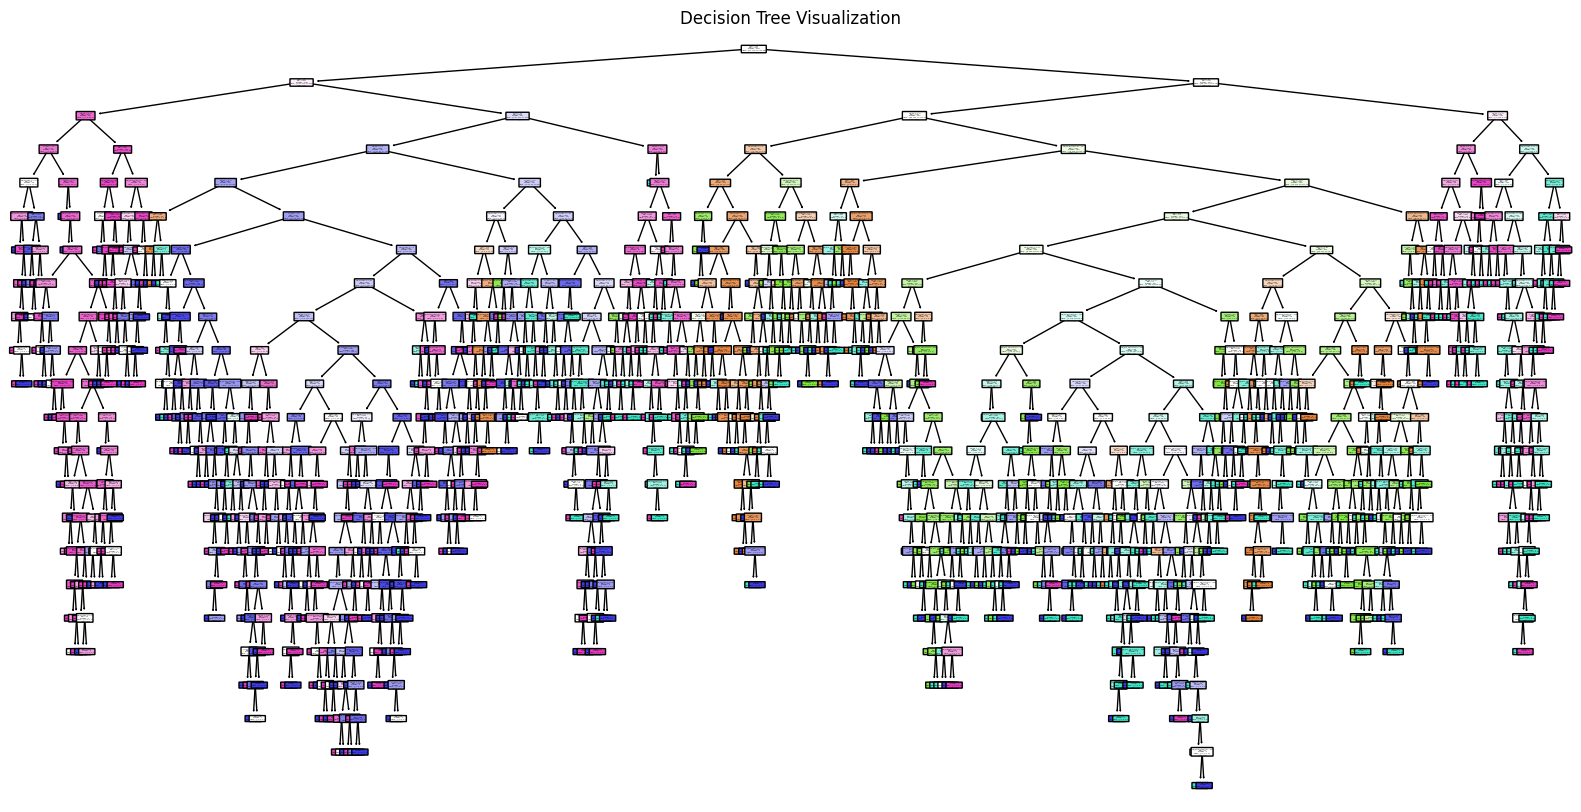

In [51]:
# Assuming 'decision_tree' is your trained Decision Tree model
plt.figure(figsize=(20,10))  # Set the size of the figure for the plot
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


As we can see in the diagram, our Decision Tree model is quite complex, reaching a depth of 22 layers. This level of complexity might have caused overfitting, where the model is too fitted to the training data and may not perform well on new, unseen data. Let's find the best depth to increase our test accuracy.

#### Reducing the complexity of the model: limiting `max_depth`

Max Depth: 1, Testing Accuracy: 0.361%
Max Depth: 2, Testing Accuracy: 0.430%
Max Depth: 3, Testing Accuracy: 0.547%
Max Depth: 4, Testing Accuracy: 0.572%
Max Depth: 5, Testing Accuracy: 0.596%
Max Depth: 6, Testing Accuracy: 0.620%
Max Depth: 7, Testing Accuracy: 0.636%
Max Depth: 8, Testing Accuracy: 0.672%
Max Depth: 9, Testing Accuracy: 0.719%
Max Depth: 10, Testing Accuracy: 0.744%
Max Depth: 11, Testing Accuracy: 0.767%
Max Depth: 12, Testing Accuracy: 0.764%
Max Depth: 13, Testing Accuracy: 0.784%
Max Depth: 14, Testing Accuracy: 0.803%
Max Depth: 15, Testing Accuracy: 0.818%
Max Depth: 16, Testing Accuracy: 0.824%
Max Depth: 17, Testing Accuracy: 0.830%
Max Depth: 18, Testing Accuracy: 0.824%
Max Depth: 19, Testing Accuracy: 0.829%
Max Depth: 20, Testing Accuracy: 0.825%
Max Depth: 21, Testing Accuracy: 0.829%
The best max_depth is: 17, with an accuracy of 0.830%


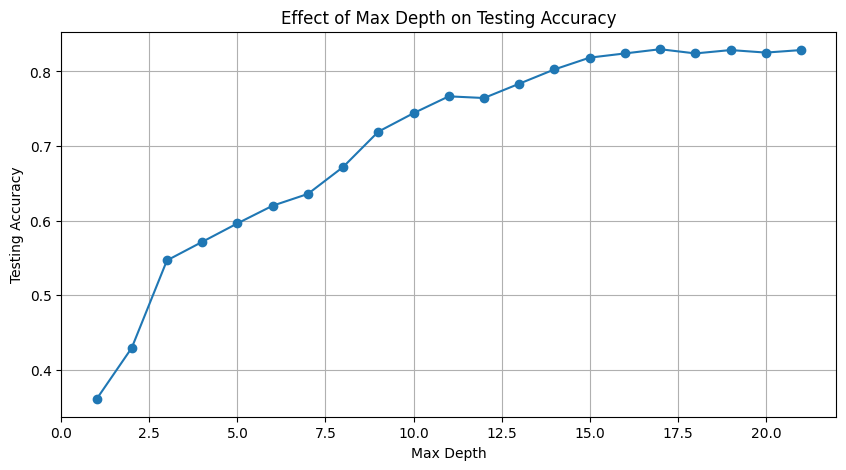

In [52]:
# Exploring the effect of 'max_depth' on model accuracy
max_depths = range(1, 22)
accuracies = []

for depth in max_depths:
    # Initialize the Decision Tree with different max_depth
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)

    # Evaluate the model
    accuracy = model.score(X_test, y_test)
    accuracies.append(accuracy)
    print(f"Max Depth: {depth}, Testing Accuracy: {accuracy:.3f}%")

# Find the max_depth that gives the highest accuracy
best_index = accuracies.index(max(accuracies))
best_depth = max_depths[best_index]
print(f"The best max_depth is: {best_depth}, with an accuracy of {accuracies[best_index]:.3f}%")

# Plotting max_depths vs accuracies
plt.figure(figsize=(10, 5))
plt.plot(max_depths, accuracies, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Testing Accuracy')
plt.title('Effect of Max Depth on Testing Accuracy')
plt.grid(True)
plt.show()

**What happened** here is that after experimenting with various depths for our Decision Tree, we've found that a maximum depth of 17 gives us the best testing accuracy of 83.0%. This suggests that beyond this point, increasing the depth doesn't significantly improve the model's performance on new data, and can actually lead to a decrease in accuracy, likely due to overfitting.

## Practice

Let's visualize a tree with `max_depth` of 17.

In [53]:
# Your Code Here


<details><summary>Click here for the answer</summary>

```python    
model = DecisionTreeClassifier(max_depth=17, random_state=42)
model.fit(X_train, y_train)

# Visualize
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=True, rounded=True)
plt.title("Decision Tree (max_depth=17) Visualization")
plt.show()
```

</details>

### Thank you and good luck!